Detecting Parkinsons Disease with XGBCLASSIFIER Ensemble Method "Decision Trees" Machine Learning Technique
" Detects the presence of Parkinson's in an indvidual.Parkinsons Disease is a progressive disorder to the central nervous system affecting movement and inducing tumors and stiffness, it has 5 stages to it and affects more than 4 million individuals yearly world wide. This is chronic and has no cure, its also a neurodegenerative disorder that affects how the brain produces dopamine.

In [2]:
import  numpy as np # Loading necessary Libraries to use for Project
import pandas as pd
import  os,sys
from sklearn.preprocessing import MinMaxScaler
#from xgboost import XGBClassifier and other necessary ML algorithms we are gonna test
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, confusion_matrix
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import GaussianNB as gnb
from sklearn.model_selection import cross_val_score
from sklearn import tree

In [3]:
# Read-the-Data
df = pd.read_csv(r'C:\Users\mjcol\OneDrive\Desktop\PYTHON\parkinsons.data')#Use r so you wont get Unicode error!
#os.getcwd() use this command to check the Path!
# how you get extract certain Features
features = df.loc[:,df.columns!='status'].values[:,1:]# values method ;list of values in a Given Dictionary ['status']
labels= df.loc[:,'status'].values
df.head(5)
#labels
# I dont think the name Column serves much of a purpose but for no we will leave it 


,name,MDVP:Fo(Hz),MDVP:Fhi(Hz),MDVP:Flo(Hz),MDVP:Jitter(%),MDVP:Jitter(Abs),MDVP:RAP,MDVP:PPQ,Jitter:DDP,MDVP:Shimmer,...,Shimmer:DDA,NHR,HNR,status,RPDE,DFA,spread1,spread2,D2,PPE
0,phon_R01_S01_1,119.992,157.302,74.997,0.00784,0.00007,0.00370,0.00554,0.01109,0.04374,...,0.06545,0.02211,21.033,1,0.414783,0.815285,-4.813031,0.266482,2.301442,0.284654
1,phon_R01_S01_2,122.400,148.650,113.819,0.00968,0.00008,0.00465,0.00696,0.01394,0.06134,...,0.09403,0.01929,19.085,1,0.458359,0.819521,-4.075192,0.335590,2.486855,0.368674
2,phon_R01_S01_3,116.682,131.111,111.555,0.01050,0.00009,0.00544,0.00781,0.01633,0.05233,...,0.08270,0.01309,20.651,1,0.429895,0.825288,-4.443179,0.311173,2.342259,0.332634
3,phon_R01_S01_4,116.676,137.871,111.366,0.00997,0.00009,0.00502,0.00698,0.01505,0.05492,...,0.08771,0.01353,20.644,1,0.434969,0.819235,-4.117501,0.334147,2.405554,0.368975
4,phon_R01_S01_5,116.014,141.781,110.655,0.01284,0.00011,0.00655,0.00908,0.01966,0.06425,...,0.10470,0.01767,19.649,1,0.417356,0.823484,-3.747787,0.234513,2.332180,0.410335


In [4]:
#Common methods for working with Pandas Dataframes
# isnull() is empty
# notnull() not empty
# dropna() drop empty rows or col
# fillna() fill Null or empty
# replace() replace rows or Col
# interpolate() fills missing values using linear method ,ignores index
df.describe().transpose()
#features


,count,mean,std,min,25%,50%,75%,max
MDVP:Fo(Hz),195.0,154.228641,41.390065,88.333000,117.572000,148.790000,182.769000,260.105000
MDVP:Fhi(Hz),195.0,197.104918,91.491548,102.145000,134.862500,175.829000,224.205500,592.030000
MDVP:Flo(Hz),195.0,116.324631,43.521413,65.476000,84.291000,104.315000,140.018500,239.170000
MDVP:Jitter(%),195.0,0.006220,0.004848,0.001680,0.003460,0.004940,0.007365,0.033160
MDVP:Jitter(Abs),195.0,0.000044,0.000035,0.000007,0.000020,0.000030,0.000060,0.000260
MDVP:RAP,195.0,0.003306,0.002968,0.000680,0.001660,0.002500,0.003835,0.021440
MDVP:PPQ,195.0,0.003446,0.002759,0.000920,0.001860,0.002690,0.003955,0.019580
Jitter:DDP,195.0,0.009920,0.008903,0.002040,0.004985,0.007490,0.011505,0.064330
MDVP:Shimmer,195.0,0.029709,0.018857,0.009540,0.016505,0.022970,0.037885,0.119080
MDVP:Shimmer(dB),195.0,0.282251,0.194877,0.085000,0.148500,0.221000,0.350000,1.302000


In [5]:
print(labels[labels==1].shape[0], labels[labels==0].shape[0])#You can use shape[0] method to count number of Rows[1]for col

147 48


In [26]:
df.status.value_counts()#Much easier way to get the number of values in the status Column!

1    147
0     48
Name: status, dtype: int64

Detecting Outliers with Box and Whisker Graphs, outliers are normally data that is more than 3 standard deviations away from the MEAN

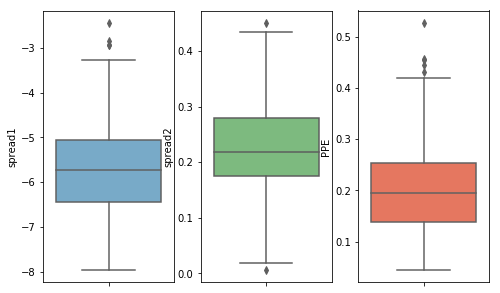

In [21]:
fig, ax = plt.subplots(1,3, figsize=(8,5))
sns.boxplot(x='spread1',data=df,ax=ax[0],orient='v',palette="Blues")
sns.boxplot(x='spread2',data=df,ax=ax[1],orient='v',palette="Greens")
sns.boxplot(x='PPE',data=df,ax=ax[2],orient='v',palette='Reds')

# We are going to use distplots as another method of univariate analysis for different variables our dataset has!


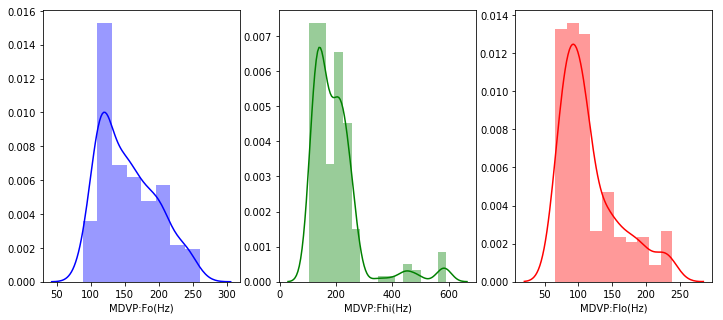

In [37]:
fig, ax = plt.subplots(1,3,figsize = (12,5))
sns.distplot(df['MDVP:Fo(Hz)'],ax=ax[0],color='b')
sns.distplot(df['MDVP:Fhi(Hz)'],ax=ax[1],color='g')
sns.distplot(df['MDVP:Flo(Hz)'],ax=ax[2],color='r')

From our analysis we can see that the minimal focal fundamental(Flo(Hz)) frequency is positively
skewed with more high values ranging from 75hz and 125hz,our maximum vocal fundamental frequency(Fhi(Hz)) doesnt have any
skew but has some ranges at the outter right tail and last but not least our avergae fundamental frequency(Fo(Hz)) looks to
be normally distributed with higher values ranging from 75 hz to 130 hz.


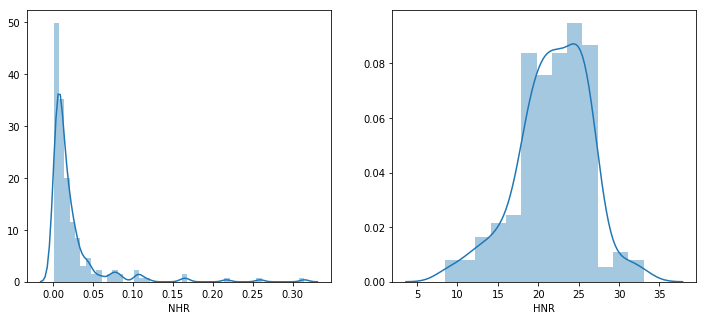

In [39]:
fig, ax = plt.subplots(1,2,figsize=(12,5))
sns.distplot(df['NHR'],ax=ax[0])
sns.distplot(df['HNR'],ax=ax[1])

NHR AND HNR are two measures of ratio to tonal components in the voice and as we can see
NHR is skewed to the right with the maximum number of observations in between 0.0 and 0.4 and HNR seems to 
be distributed normally but with a slight negative skew

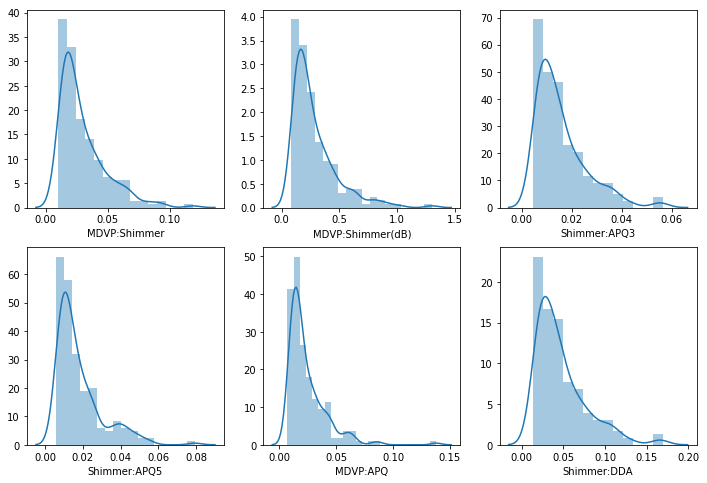

In [47]:
fig, ax = plt.subplots(2,3,figsize=(12,8))
sns.distplot(df['MDVP:Shimmer'],ax=ax[0,0])
sns.distplot(df['MDVP:Shimmer(dB)'],ax=ax[0,1])
sns.distplot(df['Shimmer:APQ3'],ax=ax[0,2])
sns.distplot(df['Shimmer:APQ5'],ax=ax[1,0])
sns.distplot(df['MDVP:APQ'],ax=ax[1,1])
sns.distplot(df['Shimmer:DDA'],ax=ax[1,2])

as we can clearly see all these features are positively skewed and its safe to assume that the mean is greater than the 
median or middle values in these features

Now lets move on to Bi-variate Analysis

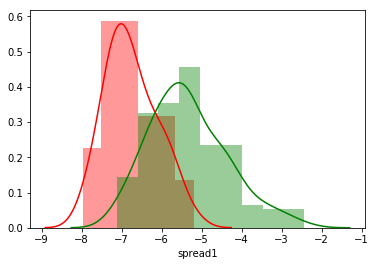

In [54]:
sns.distplot(df[df.status == 0]['spread1'],color='r')
sns.distplot(df[df.status== 1]['spread1'],color='g')

patients between -8 and -7 seems to be in the norm and patients between -6 and -5 spread1 are having PD

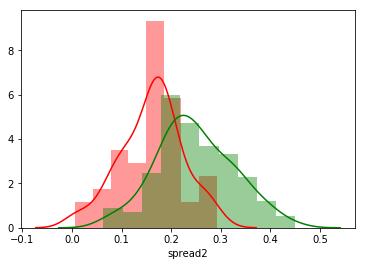

In [55]:
sns.distplot(df[df.status == 0]['spread2'],color='r')
sns.distplot(df[df.status== 1]['spread2'],color='g')

Patients who's spread is between .0 and .2 are normal and not having PD and the people over .2 are having PD

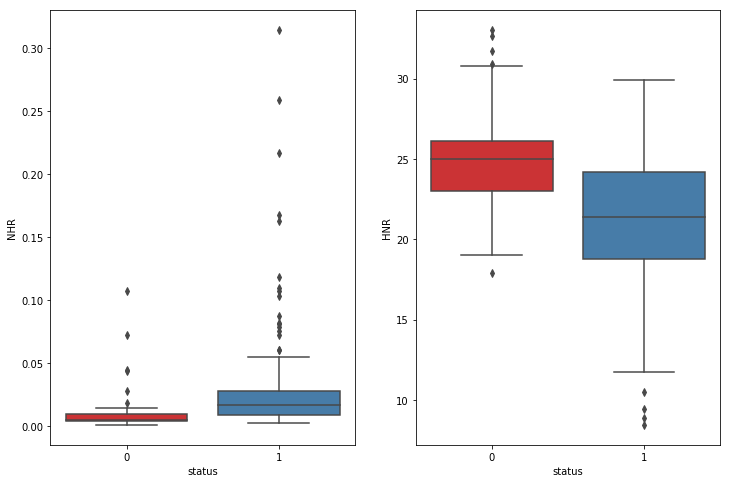

In [62]:
fig, ax= plt.subplots(1,2,figsize=(12,8))
sns.boxplot(x='status',y='NHR',data=df,ax=ax[0],palette='Set3')
sns.boxplot(x='status',y='HNR',data=df,ax=ax[1],palette='Set1')

People who have Parkinsons has higher NHR ratio and lower to HNR ratio

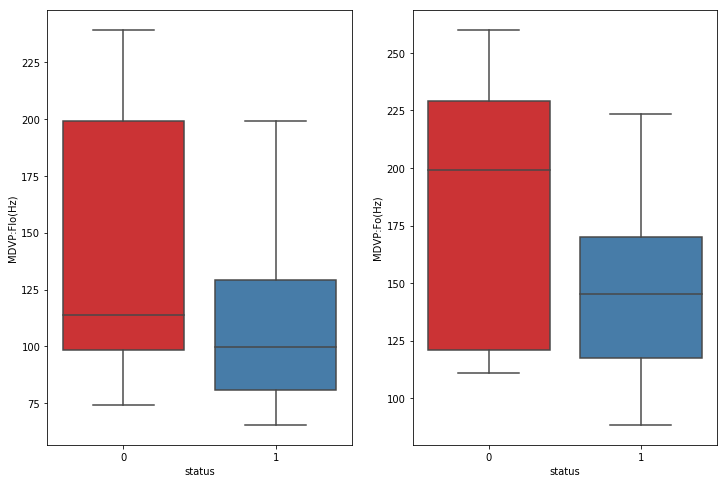

In [65]:
fig, ax=plt.subplots(1,2,figsize=(12,8))
sns.boxplot(x='status',y='MDVP:Flo(Hz)',data=df,palette='Set1',ax=ax[0])
sns.boxplot(x='status',y='MDVP:Fo(Hz)',data=df,palette='Set1',ax=ax[1])

As we can see with MDVP:Fo(Hz)the median value is around 199 with people who dont have Parkinsons
    and 145 for those who are diagnosed with Parkinsons

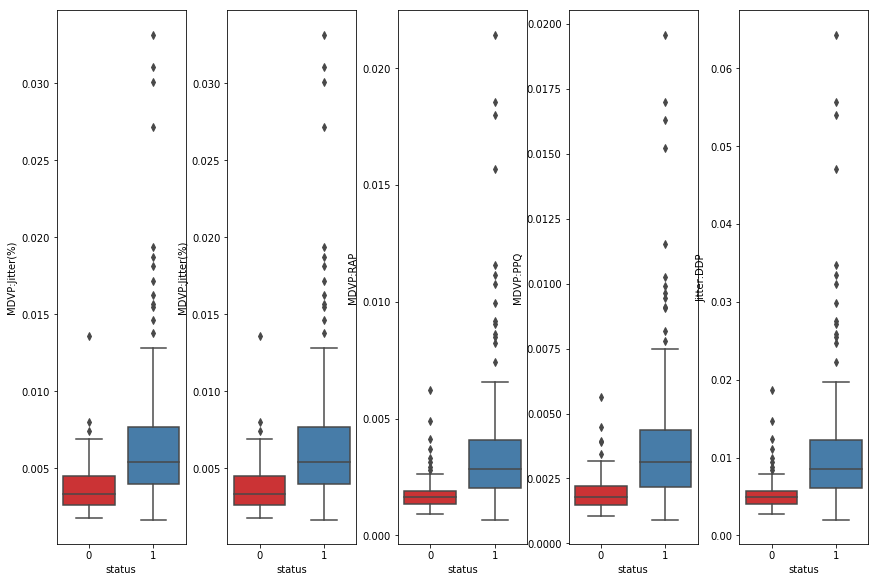

In [70]:
cols = ['MDVP:Jitter(%)','MDVP:Jitter(%)','MDVP:RAP','MDVP:PPQ','Jitter:DDP']
fig, axs=plt.subplots(ncols=5,figsize=(12,8))
fig.tight_layout()
for i in range(0,len(cols)):
    sns.boxplot(x='status',y=cols[i],data=df,ax=axs[i],palette='Set1')

Patients diagnosed with Parkinsons have higher Jitter % than those who are not diagnosed and by looking at the outliers
we can confirm that patients that are over .15 are having parkinsons.